# American Sign Language Prediction - A Classification Problem

### The Motivation
Using the potential of machine learning to aid people with hearing and speech disabilities through a system capable of automatically detecting sign language by mapping hand signs to the corresponding language characters.

### The Dataset

Sourced from <i>Kaggle</i>, the "Sign Language MNIST" dataset primarily contains data in csv format containing the following features about the hand-sign images:
- Label - The integer representation of English characters (A-Y = 0 to24; excludes J). The first column of the datasets represent the label.
- 784 features - The remaining 784 columns contain a grayscale (0-255) value of each pixel of the 28x28 image corresponding to the hand signs related to the respective characters.
- The training data contains 27,455 labelled cases of hand shapes – approximately 1100 for each hand-sign, while the test data contain 7,172 labelled cases of hand shapes.
- Following are some sample hand-signs from the training and test data sets:

<b><i>Training Samples</i></b>:
<table>
<tr>
<td><img src="sign_train3.png"></td>
<td><img src="sign_train7.png"></td>
<td><img src="sign_train20.png"></td>
</tr>
</table>

<b><i>Test Samples</i></b>:
<table>
<tr>
<td><img src="sign_test156.png"></td>
<td><img src="sign_test256.png"></td>
<td><img src="sign_test258.png"></td>
</tr>
</table>

### The Goal

The primary goal of this project is to train and build a machine learning model which would take an image as input and output the corresponding American sign language character. In technical terms, the algorithm will fall into the category of classifiers. There are finite number of labels and the system has the task of classifying an input image with one of those labels.

In terms of the machine learning pipeline, the goal is to augment the performance characeristics of the system from the baseline by fitting the available data to applicable models.

## Machine Learning Process

In [1]:
#Importing the libraries

import numpy as np
import pandas as pd
import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib import pyplot as plt
%matplotlib inline

### Baseline

A baseline for this system would be to identify how consistent or similar, the features (image patterns) in the raw datasets are in terms of thier ability to be classified.

To identify a baseline for the system, we determined the classifcation accuracy of the raw datasets against <i>MultinomialNB</i> and <i>KNeighborsClassifier</i>. The following implementation logic enumerates the system's baseline.

In [2]:
#load training data

train_image_list_X = []
train_image_label_Y = []

with open("sign_mnist_train.csv") as train_data:
    for i,line in enumerate(train_data):
        if(i != 0):
            train_image_list_X.append([int(element) for element in line.split(',')[1:785]])
            train_image_label_Y.append(int(line.split(',')[0]))

In [3]:
#load test data

test_image_list_X = []
test_image_label_Y = []

with open("sign_mnist_test.csv") as test_data:
    for i,line in enumerate(test_data):
        if(i != 0):
            test_image_list_X.append([int(element) for element in line.split(',')[1:785]])
            test_image_label_Y.append(int(line.split(',')[0]))

In [4]:
#original train test
X_train_np = [np.array(image) for image in train_image_list_X]
X_test_np = [np.array(image) for image in test_image_list_X]

#y(labels)
Y_train_np = np.array(train_image_label_Y)
Y_test_np = np.array(test_image_label_Y)

In [5]:
#function to execute the classfication against the selected model and return the accuracy score

def run_classification(selModel, X_train, Y_train, X_test, Y_test):
    model = MultinomialNB() #GaussianNB()
    if selModel != 'MultinomialNB':
        model = KNeighborsClassifier()
        
    model.fit(X_train, Y_train)
    predicted = model.predict(X_test)
    expected = Y_test
    print(metrics.classification_report(expected, predicted))
    #print(metrics.confusion_matrix(expected, predicted))
    return metrics.accuracy_score(expected, predicted) 

In [6]:
#The baseline determination: Performance in terms of Accuracy score & Time metrics

startTime = time.time()
print('[MultinomialNB]')
print('Accuracy: ', run_classification('MultinomialNB',X_train_np, Y_train_np, X_test_np, Y_test_np))
print('Runtime(secs): ', (time.time() - startTime), '\n')
startTime = time.time()

print()
print('[KNeighborsClassifier]')
print('Accuracy: ', run_classification('KNN',X_train_np, Y_train_np, X_test_np, Y_test_np))
print('Runtime(secs): ', (time.time() - startTime))

[MultinomialNB]
             precision    recall  f1-score   support

          0       0.57      0.78      0.66       331
          1       0.91      0.65      0.76       432
          2       0.65      0.62      0.63       310
          3       0.48      0.43      0.45       245
          4       0.75      0.66      0.70       498
          5       0.46      0.49      0.48       247
          6       0.50      0.47      0.49       348
          7       0.84      0.58      0.68       436
          8       0.26      0.22      0.24       288
         10       0.31      0.53      0.39       331
         11       0.64      0.68      0.66       209
         12       0.36      0.19      0.25       394
         13       0.35      0.22      0.27       291
         14       0.47      0.52      0.50       246
         15       0.45      0.76      0.56       347
         16       0.74      0.74      0.74       164
         17       0.37      0.48      0.41       144
         18       0.10      0

### Model Evaluation

### Approach 1 - MultinomialNB, KNeighborsClassifier

Reflecting on the nature of data and encouraged by the digit classification activity, our approach towards model evaluation relied on identification of specific feature dominance, data re-structuring, adding supplementary features, and identifying pertinent encoding techniques to transform the data from a collection of pixel values to encoded values indicative of patterns.

The following techniques were applied as part this approach to progress from the baseline:

- Background Isolation:
 An intuitive but logical strategy, we tried to isolate the image background and allow the datasets to comprise of only the  relevant hand-sign pixel values. This would allow the model to learn from only the most important portion of data which would lead to better classification.
 
- Pixel Encoding:
 This was done in parallel to confirm our hypothesis with respect to the weak robustness of the considered models towards the variations in the test data. The results of this test have been enumerated in the presentation slides to keep this notebook clean and relevant. Grayscale values of pixels in an image tend to differ by a small delta with their immediate neighbours. This is especially true for cases where the neighbouring cell belong to the image background. In order to tackle this, we idealized an approach to encode pixel into correspinding encoded values by diving image pixel in ranges so as to get a normalized pixel collection better suited for classifcation. For example, all pixel lying in the range 0-10 would be encoded as 0.
 
The following implementation logic represents the results of Approach 1:

In [7]:
#Background isolation fucntion

# If there is a block of three pixels with very little difference, make them white - to remove background
def remove_continuous_blocks(pixel_arr, delta_h=5, block_size_h=3, delta_v=4, block_size_v=5):
    pixel_arr_new = [x for x in pixel_arr]
    
    # Working horizontally on the picture
    for i in range(block_size_h//2, len(pixel_arr)-block_size_h//2):
        block = pixel_arr[i - block_size_h//2: i + block_size_h//2]
        if max(block) - min(block) < delta_h:
            for j in range(i - block_size_h//2, i + block_size_h//2):
                pixel_arr_new[j] = 255
    
    # Working vertically on the picture
    for i in range(block_size_v//2, len(pixel_arr)-block_size_v//2):
        block = [pixel_arr[k//28 + 28*(k%28 - 1) + 1] for k in range(i - block_size_v//2, i + block_size_v//2)]
        if max(block) - min(block) < delta_v:
            for k in range(i - block_size_v//2, i + block_size_v//2):
                pixel_arr_new[k//28 + 28*(k%28 - 1) + 1] = 255
    
    return pixel_arr_new

In [8]:
#Isolating the background from the datasets
X_train_isolated = np.asarray([remove_continuous_blocks(img, delta_h=8, block_size_h=4, delta_v=6, block_size_v=6) for img in X_train_np])
X_test_isolated = np.asarray([remove_continuous_blocks(img, delta_h=8, block_size_h=4, delta_v=6, block_size_v=6) for img in X_test_np])

In [9]:
#Image visulaization function

def visualize_img(pixel_arr):
    arr = np.zeros(shape=(28,28))
    for i in range(28):
        arr[i] = np.asarray([int(x) for x in pixel_arr[28*i: 28*(i+1)]])
    plt.imshow(arr, cmap='gray', interpolation='nearest', vmin=0, vmax=255)
    plt.show()

Original Image:


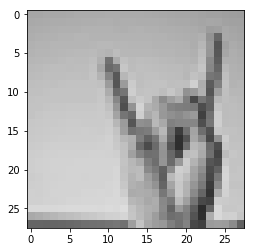

Background Isolated:


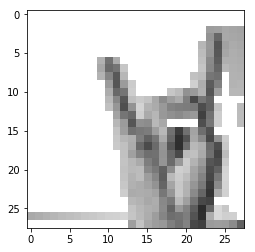

In [10]:
print('Original Image:')
visualize_img(test_image_list_X[299])

print('Background Isolated:')
visualize_img(X_test_isolated[299])

In [11]:
#Applying classification on the processed datasets to determine accuracy and run-time

startTime = time.time()
print('[MultinomialNB]')
print('Accuracy: ', run_classification('MultinomialNB',X_train_isolated, Y_train_np, X_test_isolated, Y_test_np))
print('Runtime(secs): ', (time.time() - startTime), '\n')
startTime = time.time()

print()
print('[KNeighborsClassifier]')
print('Accuracy: ', run_classification('KNN',X_train_isolated, Y_train_np, X_test_isolated, Y_test_np))
print('Runtime(secs): ', (time.time() - startTime))

[MultinomialNB]
             precision    recall  f1-score   support

          0       0.72      0.76      0.74       331
          1       0.75      0.61      0.67       432
          2       0.94      0.75      0.83       310
          3       0.52      0.42      0.47       245
          4       0.81      0.80      0.80       498
          5       0.79      0.74      0.77       247
          6       0.74      0.51      0.60       348
          7       0.81      0.76      0.79       436
          8       0.32      0.45      0.37       288
         10       0.29      0.35      0.32       331
         11       0.80      0.95      0.87       209
         12       0.52      0.19      0.28       394
         13       0.21      0.18      0.19       291
         14       0.62      0.52      0.57       246
         15       0.63      0.88      0.74       347
         16       0.80      0.46      0.58       164
         17       0.10      0.26      0.15       144
         18       0.24      0

#### Findings

While the performance metrics in terms accuracy increase to some extent, the result of this approach led us to deliberate again on the nature of the train and test dataset. In this process, we anlayzed that in a significant number of samples from the train and test datasets, the position of the relevant pixels (the portion of the image with the hand sign) tend to to shift frequently. To further this hypothesis, we focused on determing the impact of shifts on the result of the considered claissifcation models.

The follwing implementation logic represents the outcome of analyzing the imapct of image shifts on the accuracy. We see that the system performance degrades drastically due to the shift in the images:

In [12]:
#Function to shift pixels

def shift_image(images, delta):   #images->the list of images to be shifted; delta->the number of pixels by which the image is right shifted
    image_pixels = np.zeros(shape = (28,28))
    image_pixels_lst = []
    shifted_image_rows = []
    image_list = []
    
    for image in images:
        for i in range(0,len(image)//28):
            image_pixels_lst.append([element for element in image[i*28:i*28+28]])
            
        for row in image_pixels_lst:
            shifted_image_row = [row[j] for j in range(0,delta)] + row[0:28-delta]  #shift each row of the image by delta pixels to the right and replicate the shifted pixels in teh preceeding void space (delta)
            shifted_image_rows = shifted_image_rows + shifted_image_row
        image_list.append(shifted_image_rows)
        image_pixels = np.zeros(shape = (28,28))
        image_pixels_lst = []
        shifted_image_rows = []
    return image_list

Original Image: 


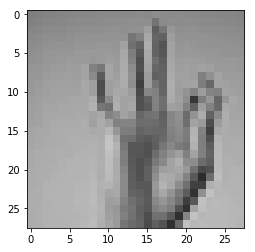

Shifted Image: 


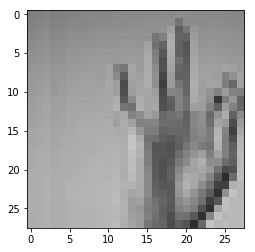

In [13]:
#Applying the shift operation on the training data set

#original image
print('Original Image: ')
visualize_img(test_image_list_X[1])

#Executing the shift operation on the training data set
test_image_list_X_new = shift_image(test_image_list_X, 3)
X_test_np_shifted = [np.array(image) for image in test_image_list_X_new]

#image after pixel shift - delta=3 (shift to right by 3 pixels)
print('Shifted Image: ')
visualize_img(test_image_list_X_new[1])

#### Accuracy after Test Data Image Shift (with raw training dataset)

In [14]:
# Determine the accuracy for the shifted test data set

startTime = time.time()
print('[MultinomialNB]')
print('Accuracy after image shift: ', run_classification('MultinomialNB',X_train_np, Y_train_np, X_test_np_shifted, Y_test_np))
print('Runtime(secs): ', (time.time() - startTime),'\n')

print()
print('[KNeighborsClassifier]')
print('Accuracy after image shift: ', run_classification('KNN',X_train_np, Y_train_np, X_test_np_shifted, Y_test_np))
print('Runtime(secs): ', (time.time() - startTime))

[MultinomialNB]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       331
          1       0.00      0.00      0.00       432
          2       0.97      0.11      0.20       310
          3       0.00      0.00      0.00       245
          4       0.30      0.08      0.13       498
          5       0.13      0.10      0.11       247
          6       0.33      0.41      0.37       348
          7       0.34      0.16      0.22       436
          8       0.12      0.41      0.19       288
         10       0.26      0.57      0.35       331
         11       0.93      0.27      0.42       209
         12       0.28      0.15      0.20       394
         13       0.44      0.10      0.17       291
         14       0.50      0.36      0.42       246
         15       0.27      0.53      0.36       347
         16       0.44      0.34      0.38       164
         17       0.00      0.00      0.00       144
         18       0.07      0

#### Accuracy after Test Data Image Shift (with raw background isolated training dataset)

In [15]:
#Determining the accuracy for the shifted test data set (with backgroun isolation)

#Executing the shift operation on the background isolated test data set
test_image_list_X_BI_Shifted = shift_image(X_test_isolated,3)
X_test_np_BI_Shifted = [np.array(image) for image in test_image_list_X_BI_Shifted]

startTime = time.time()
print('[MultinomialNB]')
print('Accuracy after image shift - MultinomialNB: ', run_classification('MultinomialNB',X_train_isolated, Y_train_np, X_test_np_BI_Shifted, Y_test_np))
print('Runtime(secs): ', (time.time() - startTime),'\n')

print()
print('[KNeighborsClassifier]')
print('Accuracy after image shift: ', run_classification('KNN',X_train_isolated, Y_train_np, X_test_np_BI_Shifted, Y_test_np))
print('Runtime(secs): ', (time.time() - startTime))

[MultinomialNB]
             precision    recall  f1-score   support

          0       0.07      0.02      0.03       331
          1       0.14      0.04      0.07       432
          2       1.00      0.20      0.34       310
          3       0.05      0.01      0.01       245
          4       0.41      0.08      0.14       498
          5       0.69      0.17      0.28       247
          6       0.36      0.30      0.32       348
          7       0.80      0.53      0.64       436
          8       0.23      0.46      0.30       288
         10       0.21      0.16      0.18       331
         11       0.93      0.52      0.67       209
         12       0.50      0.14      0.22       394
         13       0.30      0.09      0.13       291
         14       0.69      0.22      0.34       246
         15       0.24      0.86      0.38       347
         16       0.44      0.14      0.21       164
         17       0.01      0.03      0.01       144
         18       0.06      0

Here, we see that the accuracy decreases a lot when we shift the hand just by three pixels. It is easy to recoganize the problem here i.e., these models just know the pixel position and when these shift, they have no way of considering that. With that said, currently, deep learning is probably the best approach for image classification. Therefore, we researched this new realm and tried to see its impact on the problem.

### Approach 2 - Deep Learning

As we have seen that the traditional machine learning methods like KNN and Naive Bayes suffer a lot when the test images are slighltly shifted from the central position. They might be good for those particular types of images i.e., where the hand is approximately at the center of the image, but not in other cases. Thus, we move on our research to the realm of deep learning.

It is important to point here that some of material used here have been referenced by the demo notebooks by Prof. George Chen (Heinz, CMU) from his "95-865 Unstructured Data Analytics" course. <i>**The deep learning techniques were executed on 'Unbuntu Deep Learning AMI p2.xlarge instance'. Command Used: 'source activate tensorflow_p36'</i>.

In [16]:
#Import the required libraries
# Please note the we are using Keras package for deep learning

from keras import models
from keras import layers

Using TensorFlow backend.


### Transforming the data to be compatible with the neural network

Here, we tranform the data to be compatible with the neural network. There are following tranformations to both the feature matrices and the label vector:
1. Normalize feature matrices - In a neural network, the last layer always gives the probabilities for each possible label for a specific input. As probabilities lie between 0 and 1, so should be the input. Also, this transforms an integer problem to a real number one, which is easier to solve.
2. Transform labels to categorical vectors - In the above point, we told how neural network spits out a probability vector instead of a single number. Therefore, we need to transform all the training and test labels into a probability vector. For example, a label 3 (0-24 possible) will be converted to a vector with all zeros except the element at index=3, which will be 1. 

    `to_categorical(3) ==> [0,0,0,1,0,0,0,0,...,0,0] (25 elements)`

In [17]:
# Read the data from the files
df_train = pd.read_csv('sign_mnist_train.csv')
df_test = pd.read_csv('sign_mnist_test.csv')

y_train = np.asarray(df_train['label'])
X_train = np.asarray(df_train[df_train.columns.values[1:]])

y_test = np.asarray(df_test['label'])
X_test = np.asarray(df_test[df_test.columns.values[1:]])

# Rescale the data

X_train = X_train.astype(np.float32) / 255  # rescale to be between 0 and 1
X_test = X_test.astype(np.float32) / 255  # rescale to be between 0 and 1

from keras.utils import to_categorical
y_train_categ = to_categorical(y_train)
y_test_categ = to_categorical(y_test)

Another concrete example of how the transformation changes the label data

In [18]:
print('Label Data Transformation')
print('Original: ', y_train[6])
print('Tranformed: ', y_train_categ[6])

Label Data Transformation
Original:  8
Tranformed:  [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


### Single layer model

Let us start with the most basic single layer model. Following is step by step analysis on why we made certain decisions:
1. Create a sequential model - This is the most basic model in which different layers are added linearly i.e., one after the other. In other words, the output of the first layer becomes the input of the second layer and so on. We chose this primarily because it is almost always a starting point and also due to unfamiliarity with other types of models.
2. Here, we add just one dense layer. It had to be a dense layer because it is one of the core layers which shrink the input directly into the probability distribution we discussed above. The length of the output vector will be 25 because that's how many labels are possible (0-24). 'Softmax' activation is often used in the last layer of a neural network because it takes care of any negative values and gives a valid probability distribution i.e., all the values in the vector sum to 1.

We also print out the summary of the model. As you can see, there are 19,625 parameters that need to be learned from the training data.

In [19]:
single_layer_model = models.Sequential() # Keras way of indicating a linear layout of layers
single_layer_model.add(layers.Dense(25, # Number of labels which are possible (0-24)
                                            activation='softmax', # Handles negative values and gives a valid probability distribution
                                            input_shape=(784,))) # Shape of the input data - flattened 784 pixels
single_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                19625     
Total params: 19,625
Trainable params: 19,625
Non-trainable params: 0
_________________________________________________________________


Now, we compile the model. 

1. The optimizer 'rmsprop' is just used to have the algorithm run in an optimized manner. It has no effect on anything other than the runtime of the model. 

2. For the loss function, catehorical_crossentropy in a often used in neural network for multi-label classification. It is deemed as a good way to measure the difference between two probability distributions, which is all we are doing here. For the above two reasons, we chose this loss function over others.

3. For the metrics we need to maximize in learning, we chose accuracy because this is the very good measure for how well the algorithm is doing in this case.

In [20]:
single_layer_model.compile(optimizer='rmsprop',
                                   loss='categorical_crossentropy',
                                   metrics=['accuracy'])

Train the model on the training data. Here, `epochs=5` indicate that the algorithm will have five passes over the entire training dataset. On the other hand, `batch_size=128` indicates that the algorithm will work with 128 image samples at a time. There are no 'set ways' to decide on these values and there is a scope for lot of experimentation here. We tried a bunch of values and these gave a good enough accuracy, so we fixed on these.

In [21]:
single_layer_model.fit(X_train, y_train_categ, epochs=5, batch_size=128)

Epoch 1/5
27455/27455 [==============================] - 0s - loss: 2.5842 - acc: 0.2819     
Epoch 2/5
27455/27455 [==============================] - 0s - loss: 1.9127 - acc: 0.5042     
Epoch 3/5
27455/27455 [==============================] - ETA: 0s - loss: 1.6128 - acc: 0.585 - 0s - loss: 1.6073 - acc: 0.5872     
Epoch 4/5
27455/27455 [==============================] - 0s - loss: 1.4128 - acc: 0.6390     
Epoch 5/5
27455/27455 [==============================] - 0s - loss: 1.2742 - acc: 0.6761     


Run the model on the test data and measure the accuracy.

In [22]:
test_loss, test_acc = single_layer_model.evaluate(X_test, y_test_categ)
print('Test accuracy:', test_acc)

6848/7172 [===========================>..] - ETA: 0sTest accuracy: 0.50543781372


As we can see, only a single layer in the most basic neaural network gave us an accuracy of almost 60%! This is very promising and motivates us to keep on going deeper into this approach.

### Two layer model

With a background od initial success, we tried adding another dense layer to the model. The hope is that the step by step degradation instead of a one-step one will capture more features of the different hand-signals. 

1. The new layer will give the system more number of possible permutations to become more accurate in firing more neurons. However, it is very important to be aware not to give the system too many possible permutations to do that, otherwise it is likely that the model will overfit to the training data. After a bunch of expermentataion, 256 seemed like a good-enough balanced number. 
2. In this new layer, we chose to use the 'relu' activation. This simply transforms all the negative numbers to be zero. We do not need 'softmax' here because the output of this layer does not need to be a valid probability distribution.
3. The last layer is the same as the last model.

As you can see, adding a layer makes the network more complicated as the number of parameters to be learned have shot to be more than 200,000.

In [23]:
two_layer_model = models.Sequential()
two_layer_model.add(layers.Dense(256, activation='relu', input_shape=(784,)))
two_layer_model.add(layers.Dense(25, activation='softmax'))
two_layer_model.compile(optimizer='rmsprop',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])
two_layer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_3 (Dense)              (None, 25)                6425      
Total params: 207,385
Trainable params: 207,385
Non-trainable params: 0
_________________________________________________________________


Train the model on the training data with `epochs=10` and `batch_size=128`.

In [24]:
two_layer_model.fit(X_train, y_train_categ, epochs=10, batch_size=128)

Epoch 1/10
27455/27455 [==============================] - 1s - loss: 2.5606 - acc: 0.2568     
Epoch 2/10
27455/27455 [==============================] - 1s - loss: 1.7370 - acc: 0.4775     
Epoch 3/10
27455/27455 [==============================] - 1s - loss: 1.3815 - acc: 0.5767     
Epoch 4/10
27455/27455 [==============================] - 1s - loss: 1.1733 - acc: 0.6354     
Epoch 5/10
27455/27455 [==============================] - 1s - loss: 1.0251 - acc: 0.6828     
Epoch 6/10
27455/27455 [==============================] - 1s - loss: 0.9038 - acc: 0.7185     
Epoch 7/10
27455/27455 [==============================] - 1s - loss: 0.7954 - acc: 0.7553     
Epoch 8/10
27455/27455 [==============================] - 1s - loss: 0.7098 - acc: 0.7801     
Epoch 9/10
27455/27455 [==============================] - 1s - loss: 0.6334 - acc: 0.8041     
Epoch 10/10
27455/27455 [==============================] - 1s - loss: 0.5713 - acc: 0.8223     


Run the model on the test data and measure the accuracy.

In [25]:
test_loss, test_acc = two_layer_model.evaluate(X_test, y_test_categ)
print('Test accuracy:', test_acc)

6592/7172 [==========================>...] - ETA: 0sTest accuracy: 0.679866146124


As we can see, the two layer model performs better than the simpler single layer one. The accuracy already has reached more than 69% on the test dataset.

### Simple Covnet Model

Now, we head to add more complexity to our neural network by making it a convolution network (convnet). But before we can do that, we will need to transform our feature matrices. Convolution layer expects the input as a stack of images. Therefore, we reshape the flat training images to 28x28 matrix. And as we do not have multiple images for a single input, we will have a stack of 1 image.

Training data is transformed as follows: `(27455, 784) ==> (27455, 28, 28, 1)`

In [26]:
X_train_reshaped = X_train.reshape(len(X_train), 28, 28, -1) # -1 tells numpy to figure it out itself
X_test_reshaped = X_test.reshape(len(X_test), 28, 28, -1)
X_train_reshaped.shape

(27455, 28, 28, 1)

Now, we change the simple two layer model we used above and add a convolution and a max pooling layer. 

1. Intuitively, the convolution layer, when used as the first layer, will extract the low-level features in the image. At the basic level, it learns various filters and slide them accross the input image to create new output images. The new images will hopefully extract some of the interesting features and form a stack. In this layer, we configured to have 50 filters of 3x3 pixels. Again, relu activation is used to ignore the negative values and make them zero.
2. The next layer we are using is the max pooling layer. This image works to capture more global features. In more detail, it slides a 2d-window across the image and take the maximum pixel of the image within the window. This results in an image which has more global features of the image. In this case, we use a 2x2 window.
3. As the above layers work with a differently structured input than the dense layers, it is necessary to add the Flatten layer. This does exactly what its name says i.e., flattens the data into a vector format.
4. The remaining two layers are the same as above.

In [27]:
simple_convnet_model = models.Sequential()
simple_convnet_model.add(layers.Conv2D(50, (3, 3), activation='relu', input_shape=(28, 28, 1), name='conv_1'))
simple_convnet_model.add(layers.MaxPooling2D((2, 2), name='max_pool_1'))
simple_convnet_model.add(layers.Flatten())
simple_convnet_model.add(layers.Dense(250, activation='relu', name='dense_1'))
simple_convnet_model.add(layers.Dense(25, activation='softmax', name='dense_2'))
simple_convnet_model.summary()

simple_convnet_model.compile(optimizer='rmsprop',
                             loss='categorical_crossentropy',
                             metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 50)        500       
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 13, 13, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2112750   
_________________________________________________________________
dense_2 (Dense)              (None, 25)                6275      
Total params: 2,119,525
Trainable params: 2,119,525
Non-trainable params: 0
_________________________________________________________________


Train the model on the training data with `epochs=5` and `batch_size=128`.

In [28]:
simple_convnet_model.fit(X_train_reshaped, y_train_categ, epochs=5, batch_size=128)

Epoch 1/5
27455/27455 [==============================] - 13s - loss: 1.7376 - acc: 0.5429    - ETA
Epoch 2/5
27455/27455 [==============================] - 13s - loss: 0.3515 - acc: 0.9195    
Epoch 3/5
27455/27455 [==============================] - 13s - loss: 0.0750 - acc: 0.9910    
Epoch 4/5
27455/27455 [==============================] - 13s - loss: 0.0165 - acc: 0.9981    
Epoch 5/5
27455/27455 [==============================] - 13s - loss: 0.0057 - acc: 0.9991    


Run the model on the test data and measure the accuracy.

In [29]:
test_loss, test_acc = simple_convnet_model.evaluate(X_test_reshaped, y_test_categ)
print('Test accuracy:', test_acc)

7008/7172 [============================>.] - ETA: 0sTest accuracy: 0.839933073062


Its a great accuracy we get with this model - more than 84%! 

To make it clearer on how the convolution and max pooling layers are working for this model, we see the intermediate outputs of these layers for a random input image. Here, we create an intermediate model taht takes in the same input as above model but gives the output right after the convolution layer. We run a random image against that model. Then we take the stack of images that it to see what the 50 learned filters are doing with the image. It becomes clear that it extracts the edges and the important features of the image.

[Original Image]


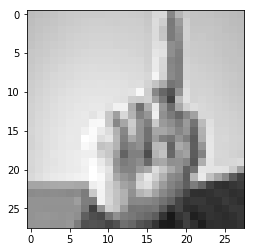

[Image after filter  0 ]


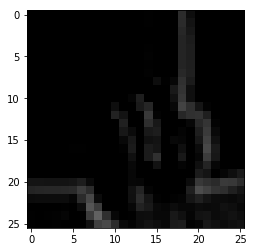

[Image after filter  1 ]


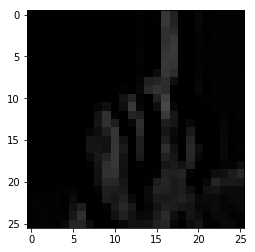

[Image after filter  2 ]


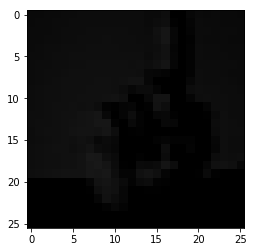

[Image after filter  3 ]


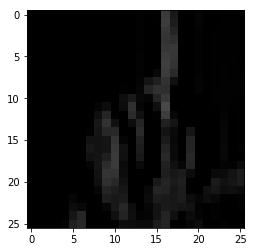

[Image after filter  4 ]


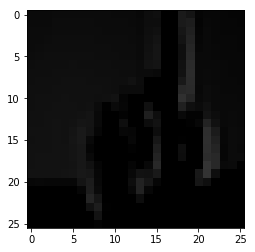

[Image after filter  5 ]


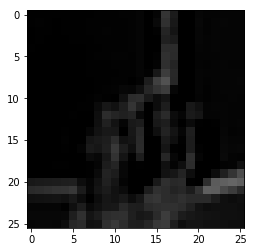

[Image after filter  6 ]


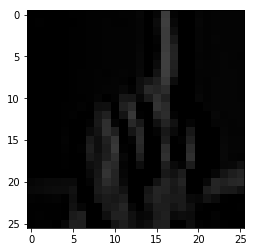

[Image after filter  7 ]


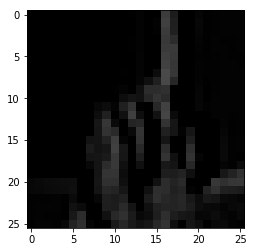

[Image after filter  8 ]


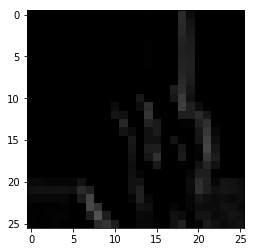

[Image after filter  9 ]


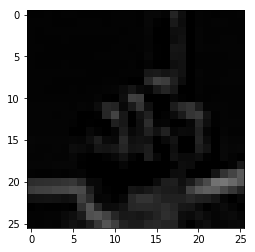

[Image after filter  10 ]


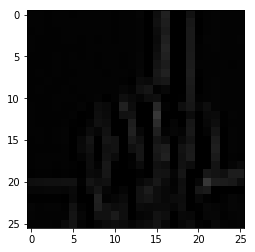

[Image after filter  11 ]


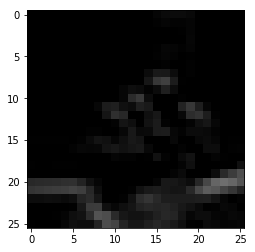

[Image after filter  12 ]


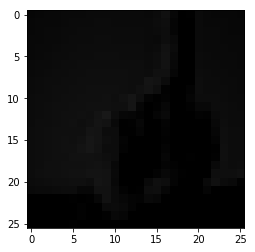

[Image after filter  13 ]


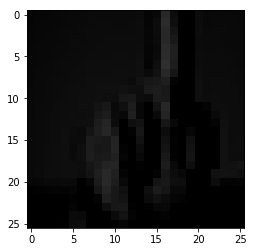

[Image after filter  14 ]


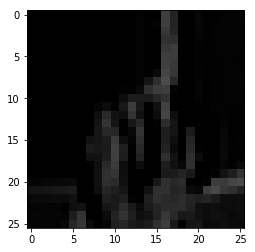

[Image after filter  15 ]


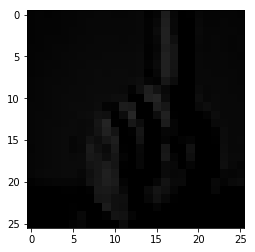

[Image after filter  16 ]


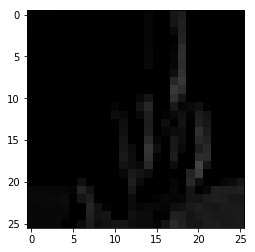

[Image after filter  17 ]


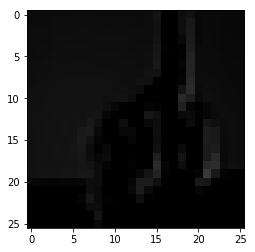

[Image after filter  18 ]


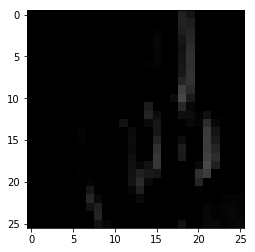

[Image after filter  19 ]


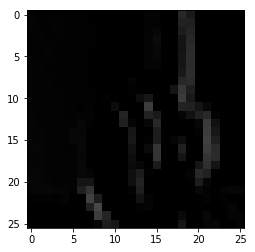

[Image after filter  20 ]


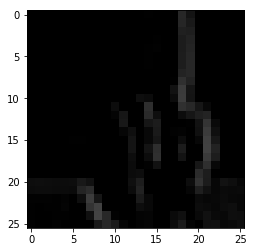

[Image after filter  21 ]


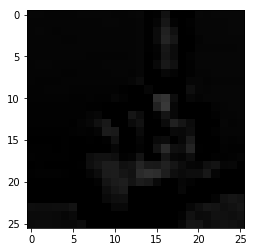

[Image after filter  22 ]


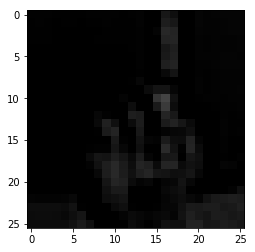

[Image after filter  23 ]


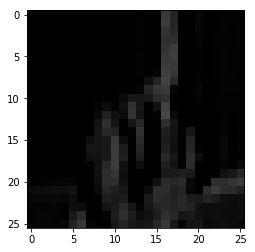

[Image after filter  24 ]


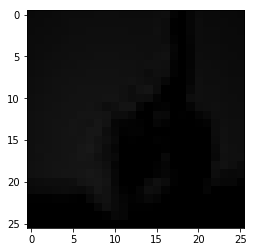

[Image after filter  25 ]


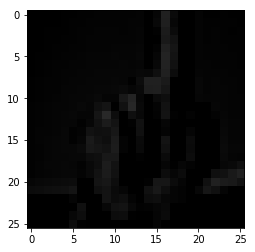

[Image after filter  26 ]


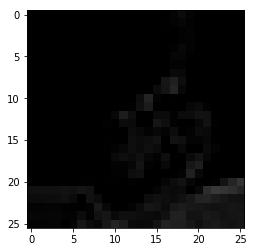

[Image after filter  27 ]


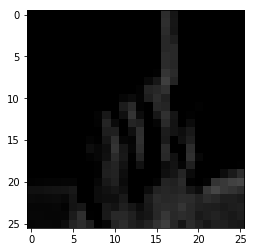

[Image after filter  28 ]


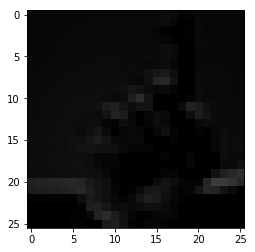

[Image after filter  29 ]


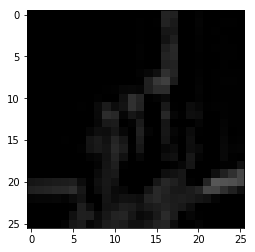

[Image after filter  30 ]


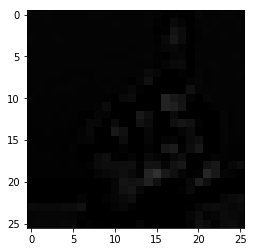

[Image after filter  31 ]


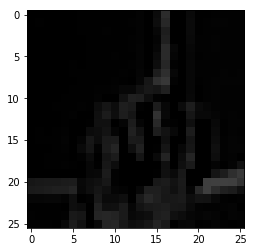

[Image after filter  32 ]


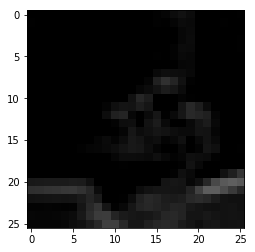

[Image after filter  33 ]


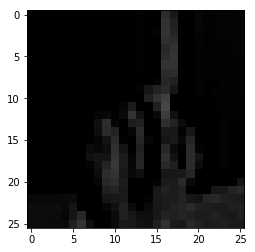

[Image after filter  34 ]


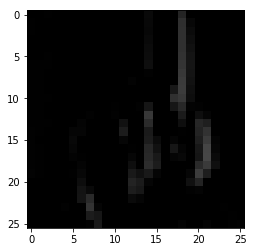

[Image after filter  35 ]


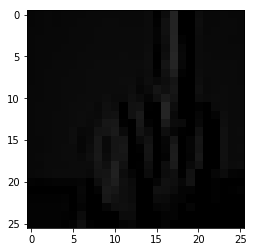

[Image after filter  36 ]


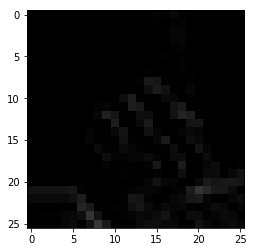

[Image after filter  37 ]


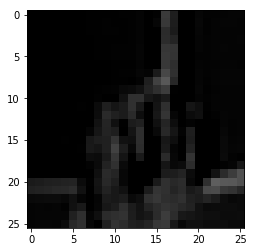

[Image after filter  38 ]


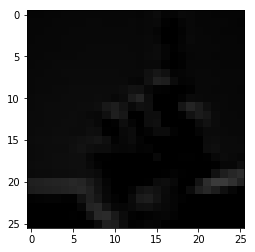

[Image after filter  39 ]


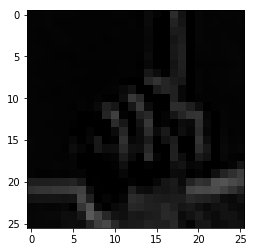

[Image after filter  40 ]


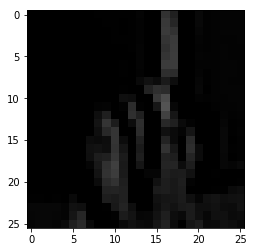

[Image after filter  41 ]


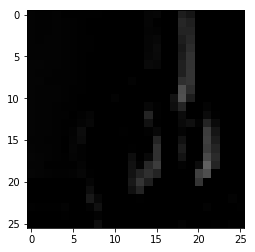

[Image after filter  42 ]


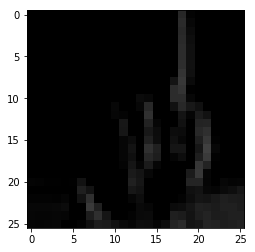

[Image after filter  43 ]


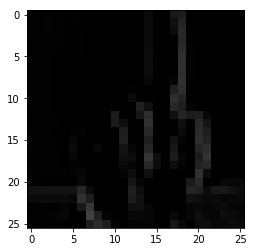

[Image after filter  44 ]


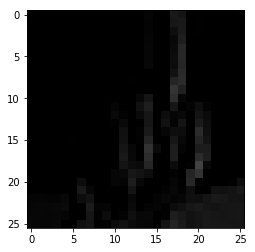

[Image after filter  45 ]


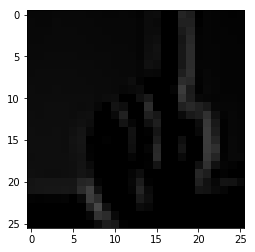

[Image after filter  46 ]


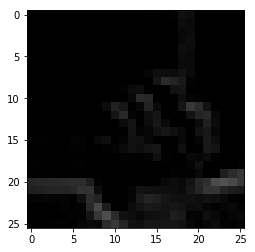

[Image after filter  47 ]


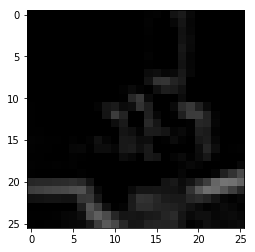

[Image after filter  48 ]


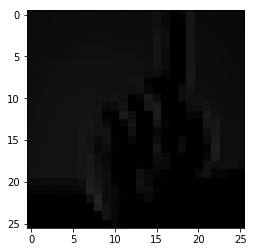

[Image after filter  49 ]


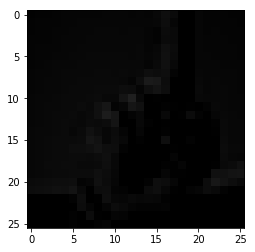

In [30]:
from keras.models import Model

intermediate_layer_model = Model(inputs=simple_convnet_model.input,
                                 outputs=simple_convnet_model.get_layer('conv_1').output)
intermediate_output = intermediate_layer_model.predict(X_test_reshaped)

print('[Original Image]')
plt.imshow(X_test_reshaped[4,:,:,0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
plt.show()

for i in range(50):
    print('[Image after filter ', i, ']')
    plt.imshow(intermediate_output[4,:,:,i], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
    plt.show()

Subsequently, let us see how the max pooling is working. We do the same process with the max pooling layer i.e., the intermediate model now gives the output after the max pooling layer. Again, we plot the entire stack of images that it gives as the output. As we see, it has the more global features but given the the really coarse 28x28 input image, the output it gives is highly pixelated. This is the reason that it does not make sense to add another covnet layer, because the input to that will be highly pixelated and will not contain much interesting features to be captured.

[Original Image]


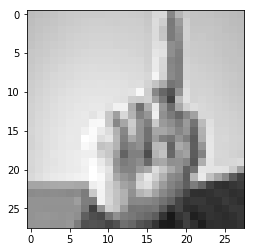

[Image after filter  0 ]


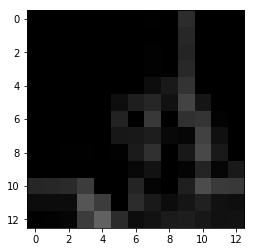

[Image after filter  1 ]


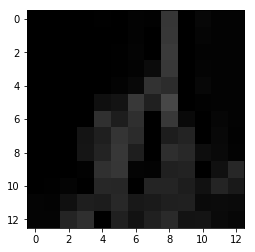

[Image after filter  2 ]


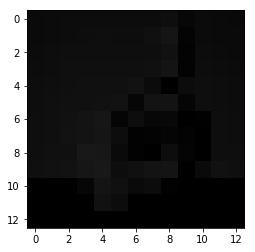

[Image after filter  3 ]


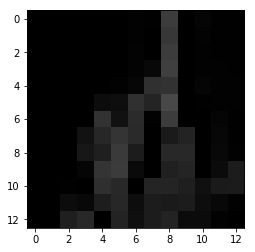

[Image after filter  4 ]


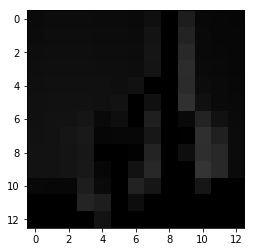

[Image after filter  5 ]


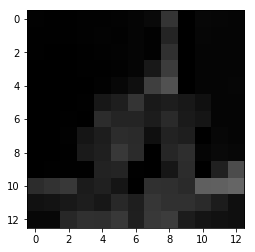

[Image after filter  6 ]


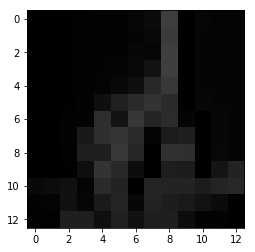

[Image after filter  7 ]


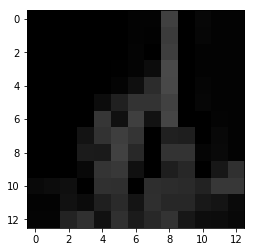

[Image after filter  8 ]


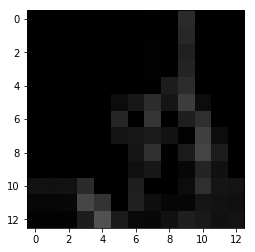

[Image after filter  9 ]


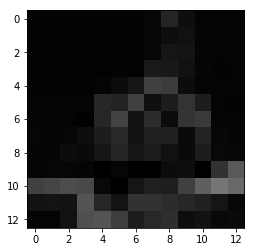

[Image after filter  10 ]


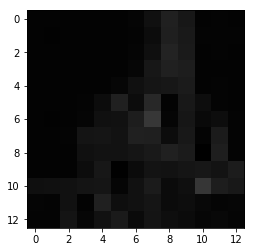

[Image after filter  11 ]


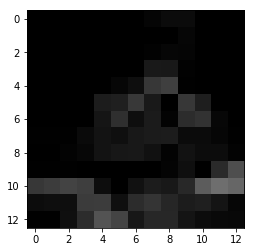

[Image after filter  12 ]


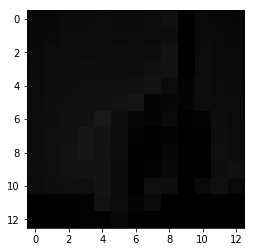

[Image after filter  13 ]


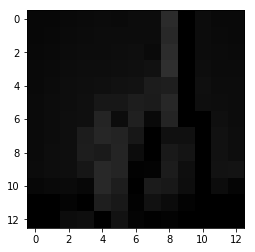

[Image after filter  14 ]


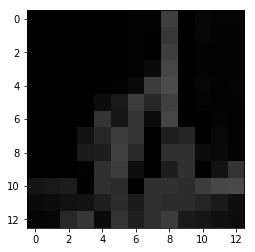

[Image after filter  15 ]


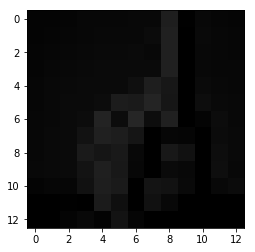

[Image after filter  16 ]


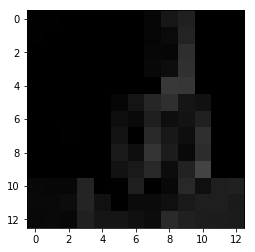

[Image after filter  17 ]


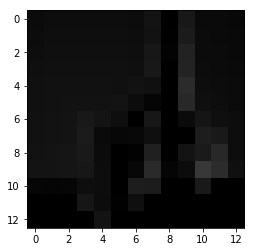

[Image after filter  18 ]


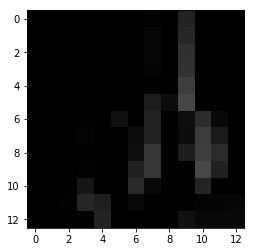

[Image after filter  19 ]


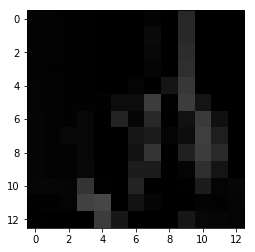

[Image after filter  20 ]


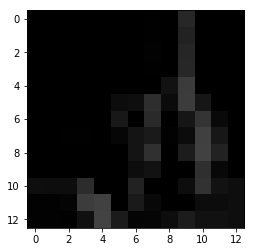

[Image after filter  21 ]


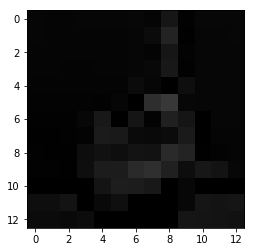

[Image after filter  22 ]


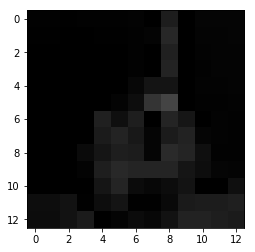

[Image after filter  23 ]


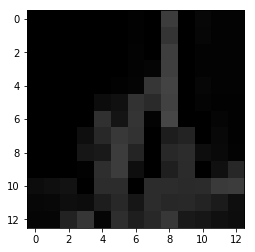

[Image after filter  24 ]


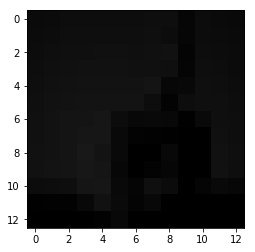

[Image after filter  25 ]


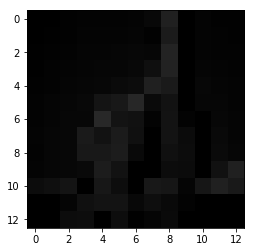

[Image after filter  26 ]


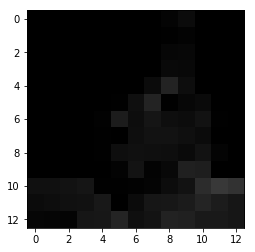

[Image after filter  27 ]


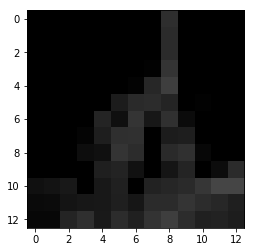

[Image after filter  28 ]


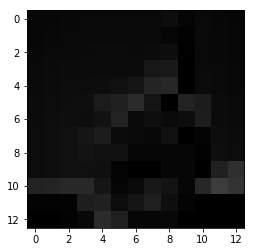

[Image after filter  29 ]


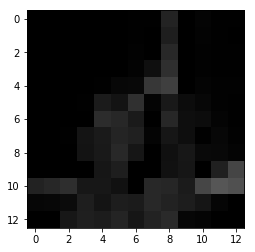

[Image after filter  30 ]


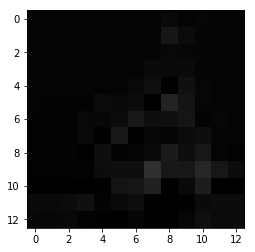

[Image after filter  31 ]


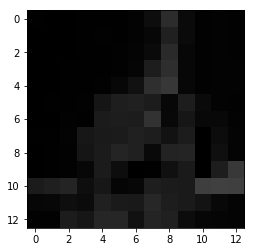

[Image after filter  32 ]


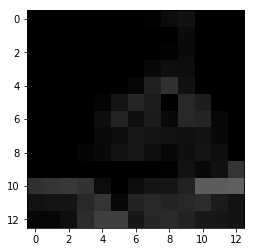

[Image after filter  33 ]


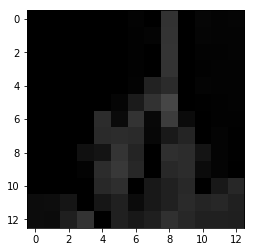

[Image after filter  34 ]


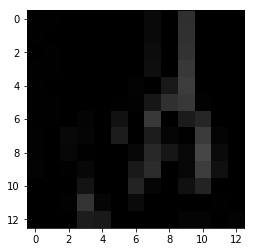

[Image after filter  35 ]


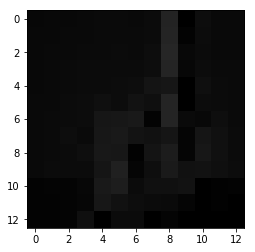

[Image after filter  36 ]


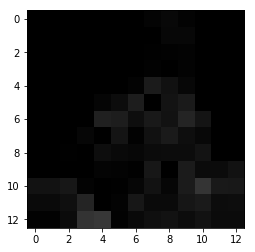

[Image after filter  37 ]


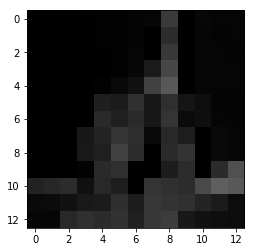

[Image after filter  38 ]


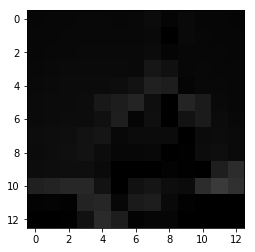

[Image after filter  39 ]


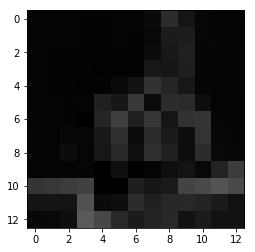

[Image after filter  40 ]


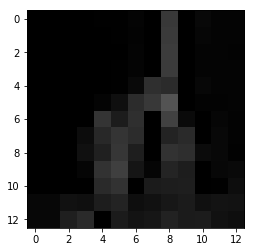

[Image after filter  41 ]


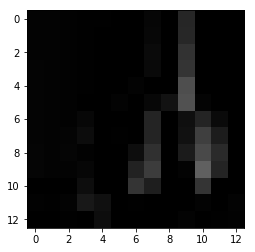

[Image after filter  42 ]


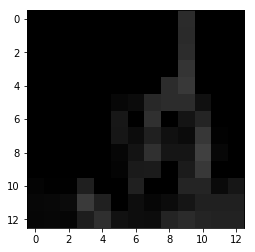

[Image after filter  43 ]


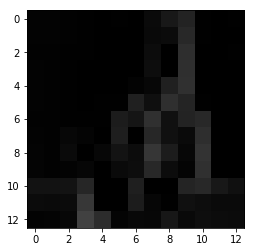

[Image after filter  44 ]


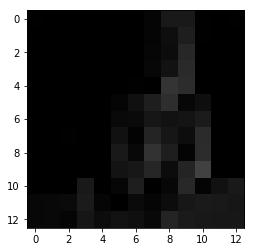

[Image after filter  45 ]


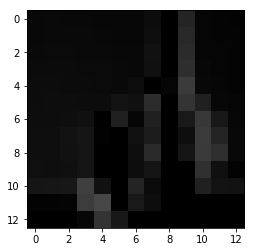

[Image after filter  46 ]


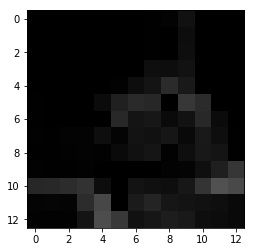

[Image after filter  47 ]


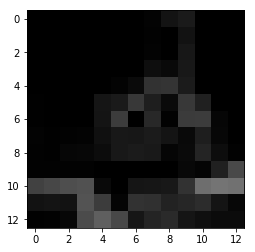

[Image after filter  48 ]


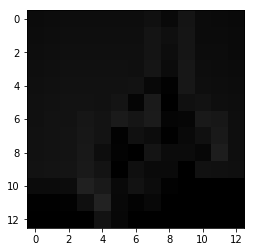

[Image after filter  49 ]


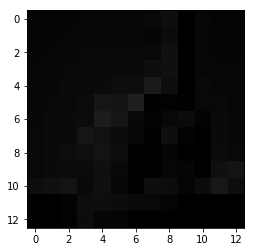

In [31]:
intermediate_layer_model = Model(inputs=simple_convnet_model.input,
                                 outputs=simple_convnet_model.get_layer('max_pool_1').output)
intermediate_output = intermediate_layer_model.predict(X_test_reshaped)

print('[Original Image]')
plt.imshow(X_test_reshaped[4,:,:,0], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
plt.show()

for i in range(50):
    print('[Image after filter ', i, ']')
    plt.imshow(intermediate_output[4,:,:,i], cmap='gray', interpolation='nearest', vmin=0, vmax=1)
    plt.show()

### Performance with shifted test data

In [32]:
#run the pixel shift function
X_test_shifted = np.asarray(shift_image(X_test,3))
X_test_shifted_reshaped = X_test_shifted.reshape(len(X_test), 28, 28, -1)
test_loss, test_acc = simple_convnet_model.evaluate(X_test_shifted_reshaped, y_test_categ)
print('Test accuracy:', test_acc)

7040/7172 [============================>.] - ETA: 0sTest accuracy: 0.437674288901


This was probably not what we expected. Even the accuracy of the deep learning model took a severe hit. However, after some deliberation on why it could have happened, we hypothesized that it is because the training data does not have these variations. It might become more robust if we train it on a dataset that has the hand-signal in various parts of the images, maybe even slightly rotated, or zoomed-in or zoomed-out. Due to lack of time, we were not able to test this hypothesis.

## Conclusion and next steps

After all this analysis, we conclude that deep learning is in fact a really good approach for image classification. Multinomial Naive-Bayes gets very limited accuracy while K-neighbours classifier takes huge amount of time. Also, KNN involves a dimple distance calculation of the test image from all the training images. Therefore, it is not very good for where we are aiming to get. We will have to train KNN for every possible variation in the image or it is highly unlikely that it will classify it correctly.

Inspired by the working of the human brain, it is interesting to see how deep learning extracts and learns various features of the image - layer by layer. In this problem, we are somewhat limited to include small number of layers because the images are very low-pixel ones. Nevertheless, visualizing the filters and outputs of various layers help us appreciate how the neural works.

As for the next steps, we would like to make the training data to include more variations of the image. Creating a hetrogenous learning impact by mixing the train and test data and re-dividing it into its subsets again would be a kickstarter in this direction. As discussed above, it will make the model more robust to small changes to the hand-signals.